# Assignment 1 Computational NeuroScience

## Simulation of the ODE system of Izhikievich model for the neuron dynamics.

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import math

Definition of the Izhikevich model dynamical system:

$
\dot{u}= 0.04 u^2 + 5u+ 140 -w +I(t)
$

$
\dot{w} =a(bu-w)
$

if $u\geq 30$ then
    $u\leftarrow c$, $w \leftarrow w+d$,
    
 where $a,b,c,d,\in \R$, $I:\R\to \R$  are some (hyper)parameters to be chosen.


## Functions for the Simulation

In [67]:
def iziechevich_euler( a, b, c, d, tspan, delta_t, I, u=-65, w=None):
    """
    Simulate the Izhikevich model using Euler's method.
    """
    if w is None:
        w = b*u  # nullcline condition
    u_dynamics=[u] 
    w_dynamics=[w]
    
    for t in range(len(I)):
        u_new = u + delta_t*(0.04*u**2 + 5*u + 140 -w + I[t])
        w_new = w+ delta_t*(a*(b*u -w))   
        
        if u_new>=30:
           u_new=c
           w_new =w+d
           u_dynamics.append(30)
        else:
            u_dynamics.append(u)
        w_dynamics.append(w)
        u=u_new
        w = w_new
    return u_dynamics, w_dynamics

In [68]:
def iziechevich_leapfrog( a, b, c, d, I, delta_t, u=-65, w=None, p_0 = 140, p_1 = 5, p_2 = 0.04):
    """
    Simulate the Izhikevich model using Euler's method.
    """
    if w is None:
        w = b*u  # nullcline condition
    u_dynamics=[u] 
    w_dynamics=[w]
    
    for t in range(len(I)):
        u = u + delta_t*(p_2*u**2 + p_1*u + p_0 -w + I[t])
        w = w+ delta_t*(a*(b*u -w))   
        
        if u>=30:
           u=c
           w =w+d
           u_dynamics.append(30)
        else:
            u_dynamics.append(u)
        w_dynamics.append(w)
       
    return u_dynamics, w_dynamics

In [99]:



def simulate_and_plot( title, a, b, c, d, I, u_0, w_0=None, delta_t=0.25, p_0 = 140, p_1 = 5, p_2 = 0.04,  solver='leapfrog'):
    """
    Simulate the Izhikevich model using Euler's method.
    """
    if w_0 is None:
        w_0=u_0 *b  # nullcline condition
    if solver == 'leapfrog':
        u, w = iziechevich_leapfrog(
            a=a,
            b=b,
            c=c,
            d=d,
            I=I,
            delta_t=delta_t,
            u=u_0,
            w=w_0,
            p_0 = p_0,
            p_1 = p_1,
            p_2 = p_2
        )


    if solver == 'euler':
        u, w = iziechevich_euler(
            a=a,
            b=b,
            c=c,
            d=d,
            tspan=1000,
            delta_t=delta_t,
            I=I,
            u=u_0,
            w=w_0
        )
    # plot of u and w dynamics
    fig, ax, = plt.subplots(1,2, figsize=(15, 5))
    ax[0].plot(u, label="u")
    ax[0].plot(w, label="w")
    ax[0].set_title(f'Dynamic ({title})')

    # plot of the phase portrait
    ax[1].plot(u, w)
    ax[1].set_title(f'Phase Portrait ({title})')

    # starting point 
    ax[1].scatter(u_0, b*u_0, c='r', label='Starting Point')


    #end point
    ax[1].scatter(u[-1], w[-1], c='g', label='End Point')
    ax[1].legend()

    return u, w , ax


## Simulations

In [206]:
def plot_feature(feature, u, w, u_0, I, delta_t=0.25, T=100):
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    t = np.arange(0, T+delta_t, delta_t)
    axes[0].plot(t,u, label="u")
    axes[0].plot(t,w, label="w")
    axes[0].set_title(f'Dynamic ({feature})')
    axes[0].legend()

    # some shenanigans to plot I nicely
    I = np.insert(I, 0, I[0]) # add the first value of I to the beginning of the array
    I = 10 * (I - min(I)) / (max(I) - min(I))
    I = I - max(I) + min(u) -5 
    axes[0].plot(t, I, linestyle='--', label='I', c='k')

    axes[1].plot(u, w)
    axes[1].set_title(f'Phase Portrait ({feature})')
    axes[1].scatter(u_0, b*u_0, c='r', label='Starting Point')
    axes[1].scatter(u[-1], w[-1], c='g', label='End Point')
    # axes[1].legend()
    # plt.show() Dont show the plot in case I want to plot other stuff
    return fig, axes

### (A) Tonic Spiking

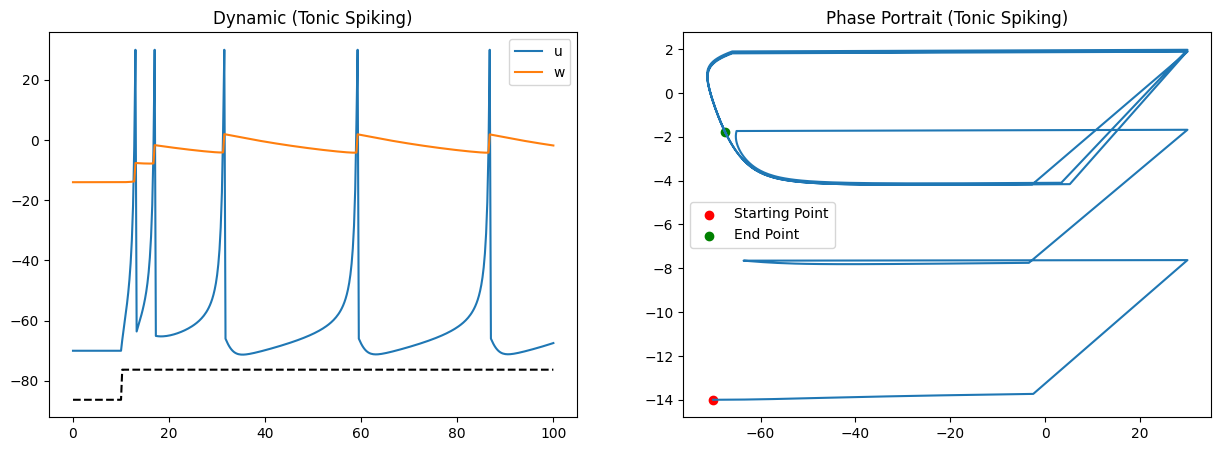

In [172]:
feature = 'Tonic Spiking'
u_0 = -70
a = 0.02
b = 0.2
c = -65
d = 6
delta_t = 0.25
T = 100 # number of steps
T1 =T/10
T = int(T/delta_t) # this make the dynamic ~ invariant to the step size delta_t
T1 = int(T1/delta_t) 
I = np.zeros(T)
I[T1:] = 14


u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)

plot_feature(feature, u, w, u_0, I)



Here, we can see from the phase potrait that we have a limit cycle. 

### (B) Phasic Spiking

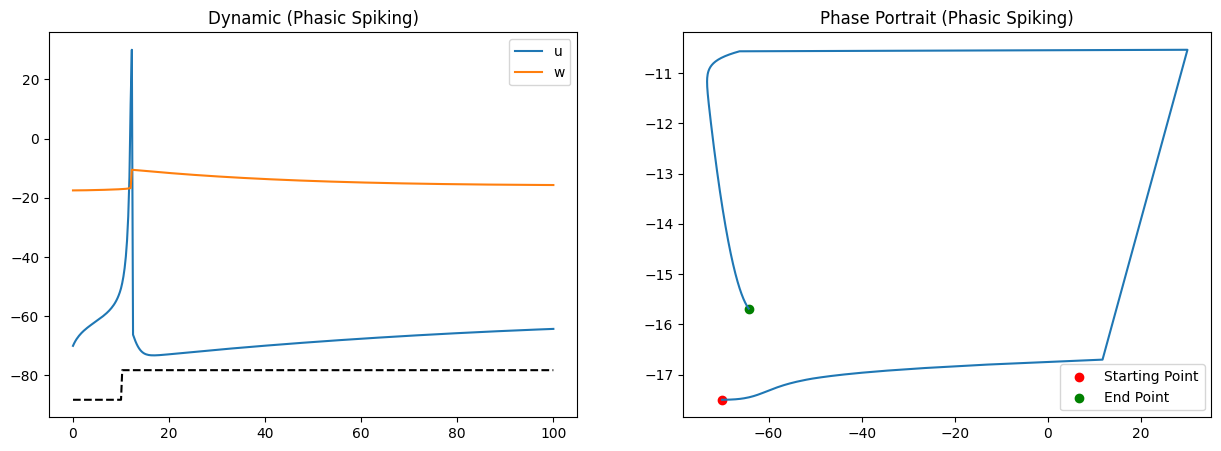

In [173]:
# (B) Phasic Spiking
u_0 = -70
a = 0.02
b = 0.25
c = -65
d = 6
delta_t = 0.25
T = 100 
T1 =T/10
T = int(T/delta_t)
T1 = int(T1/delta_t)
I = np.zeros(T)
I[T1:] = 0.5

u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)
plot_feature('Phasic Spiking', u, w, u_0, I)

### (C) Tonic Bursting

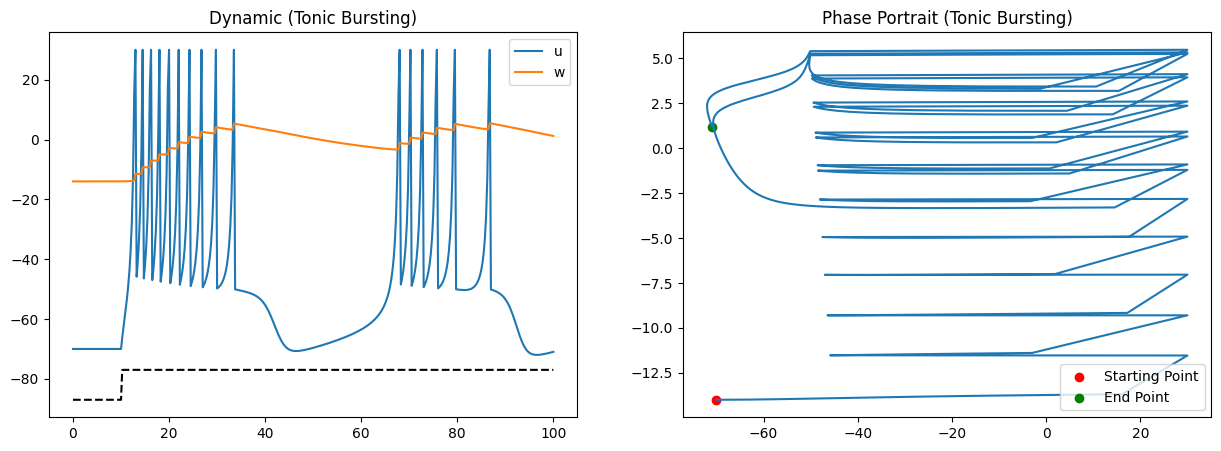

In [174]:
# (C) Tonic Bursting
u_0 = -70
a = 0.02
b = 0.2
c = -50
d = 2
delta_t = 0.25
T = 100
T1 =T/10
T = int(T/delta_t)
T1 = int(T1/delta_t)
I = np.zeros(T)
I[T1:] = 15

u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)
plot_feature('Tonic Bursting', u, w, u_0, I)



### (D) Phasic Bursting

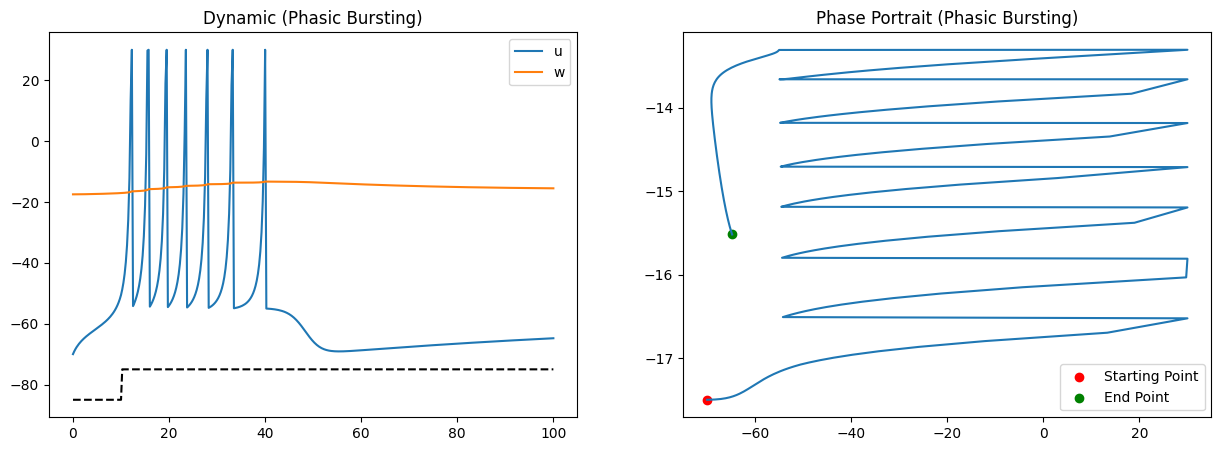

In [175]:
# (D) Phasic Bursting
u_0 = -70
a = 0.02
b = 0.25
c = -55
d = 0
delta_t = 0.25
T = 100
T1 =T/10
T = int(T/delta_t)
T1 = int(T1/delta_t)
I = np.zeros(T)
I[T1:] = 0.6

u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)
plot_feature('Phasic Bursting', u, w, u_0, I)


### (E) Mixed Mode

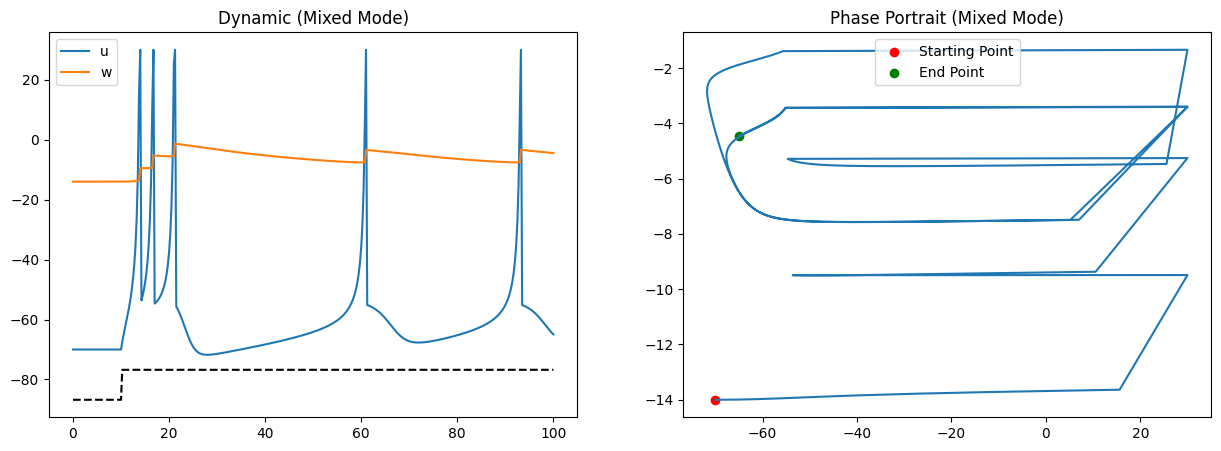

In [176]:
# (E) Mixed Mode
u_0 = -70
a = 0.02
b = 0.2
c = -55
d = 4
delta_t = 0.25
T = 100
T1 =T/10
T = int(T/delta_t)
T1 = int(T1/delta_t)
I = np.zeros(T)
I[T1:] = 10

u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)
plot_feature('Mixed Mode', u, w, u_0, I)



### (F) Spike Frequency Adaptation

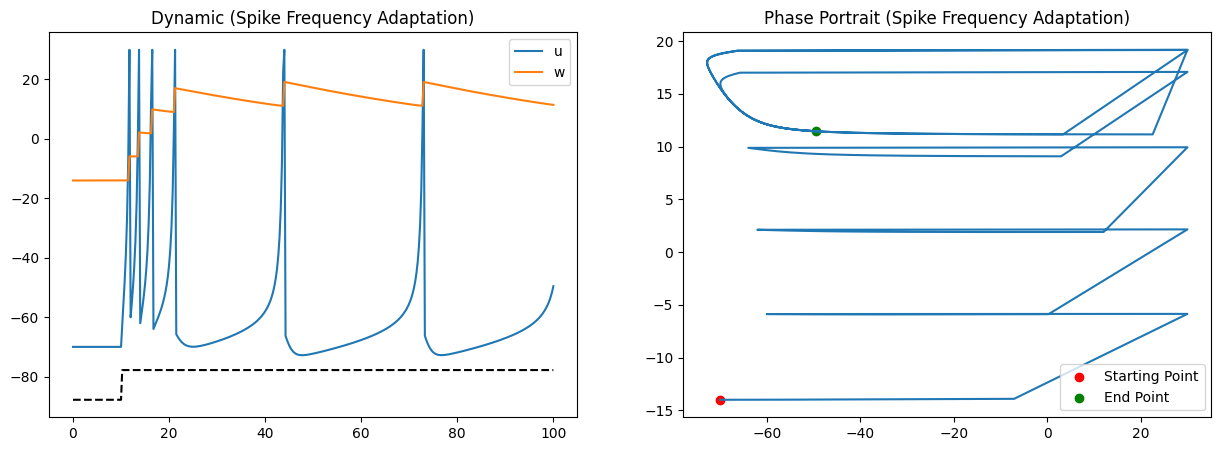

In [177]:
# (F) Spike Frequency Adaptation
u_0 = -70
a = 0.01
b = 0.2
c = -65
d = 8
delta_t = 0.25
T = 100
T1 =T/10
T = int(T/delta_t)
T1 = int(T1/delta_t)
I = np.zeros(T)
I[T1:] = 30

u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)
plot_feature('Spike Frequency Adaptation', u, w, u_0, I)

### (G) Class 1 Excitability

1080


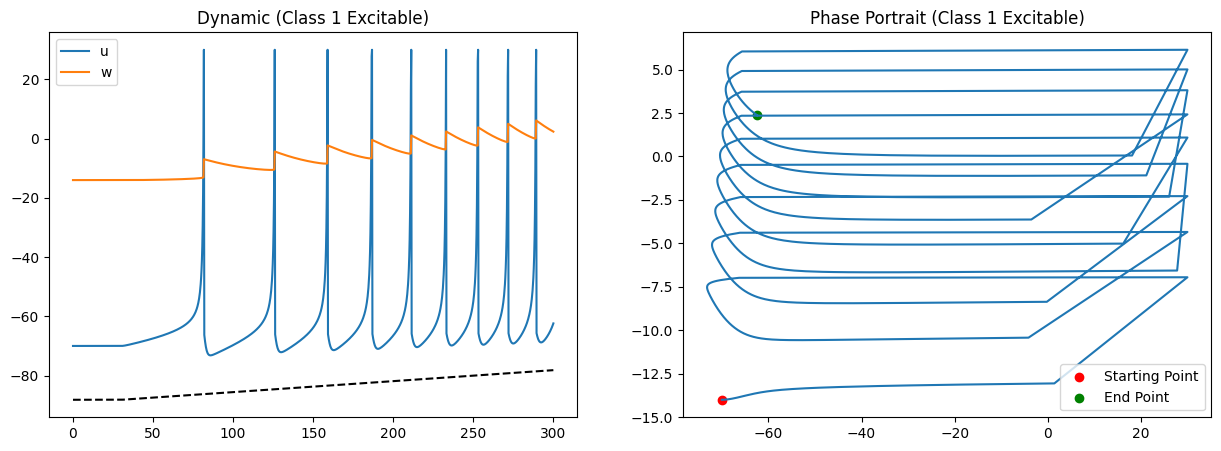

In [185]:
# (G) Class 1 Excitable
u_0 = -70
a = 0.02
b = 0.2
c = -65
d = 6
delta_t = 0.25
T = 300
T1 =30
current=np.arange(0 ,T-T1, delta_t)*0.075
print(len(current))
T = int(T/delta_t)
T1 = int(T1/delta_t)
I = np.zeros(T)
I[T1:] = current

u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)
plot_feature('Class 1 Excitable', u, w, u_0, I, delta_t=delta_t, T=300)





### (H) Class 2 Excitability

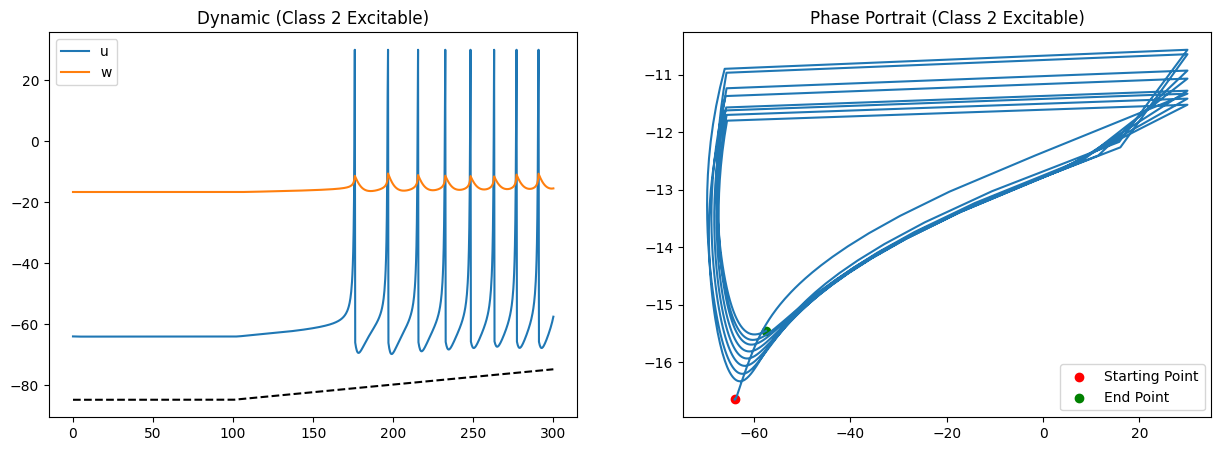

In [195]:
# (H) Class 2 Excitable
u_0 = -64
a = 0.2
b = 0.26
c = -65
d = 0
delta_t = 0.25
T = 300
T1 =100
current=np.arange(0 ,T-T1, delta_t)*0.015

T = int(T/delta_t)
T1 = int(T1/delta_t)
I = np.zeros(T) - 0.5
I[T1:] += current

u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)
plot_feature('Class 2 Excitable', u, w, u_0, I, delta_t=delta_t, T=300)



### (I) Spike Latency

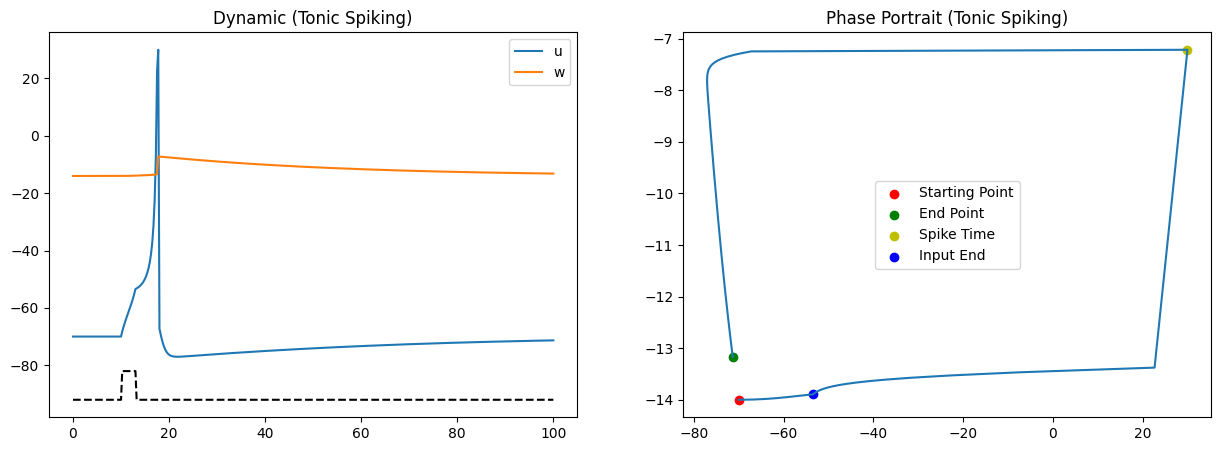

In [210]:
u_0 = -70
a = 0.02
b = 0.2
c = -65
d = 6
delta_t = 0.25
T = 100
T1 =T/10
T2 = T1+3
T = int(T/delta_t)
T1 = int(T1/delta_t)
T2 = int(T2/delta_t)
I = np.zeros(T)
I[T1:T2] = 7

u, w, = iziechevich_leapfrog( a, b, c, d, I, delta_t, u=u_0)
fi, axes = plot_feature('Tonic Spiking', u, w, u_0, I)
# let's visualize also the spike time and the input current time
spike_time = np.argmax(u)
axes[1].scatter(u[spike_time], w[spike_time], c='y', label='Spike Time')
#axes[1].scatter(u[T1], w[T1], c='b', label='Input Start') same as start point so i dont need it
axes[1].scatter(u[T2], w[T2], c='b', label='Input End')
# show the legend
axes[1].legend()
plt.show()



We can see that during all the input duration, u remains low, and the spike happens right after w increases

### (J) Subthreshold Oscillations


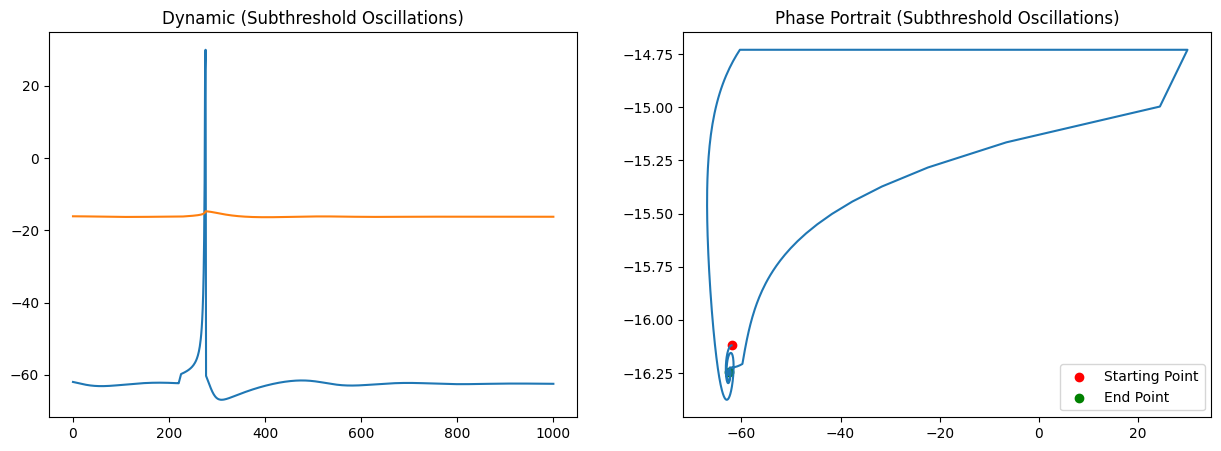

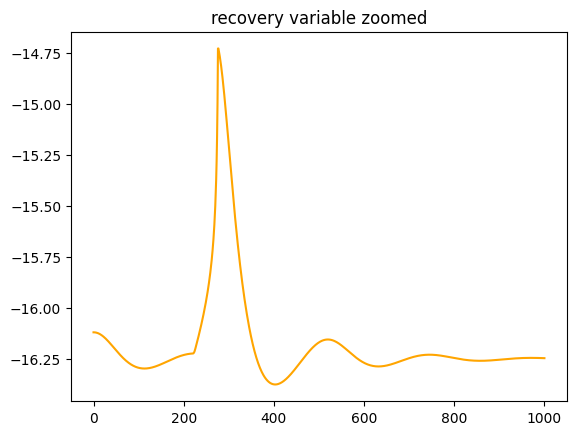

In [ ]:
u = -62
uu, ww = simulate_and_plot(u, "subthreshold_oscillations", delta_t=0.25);
#zoomed plot of w
plt.plot(ww, c='orange')
plt.title('recovery variable zoomed')
plt.show()

### (K) Resonator

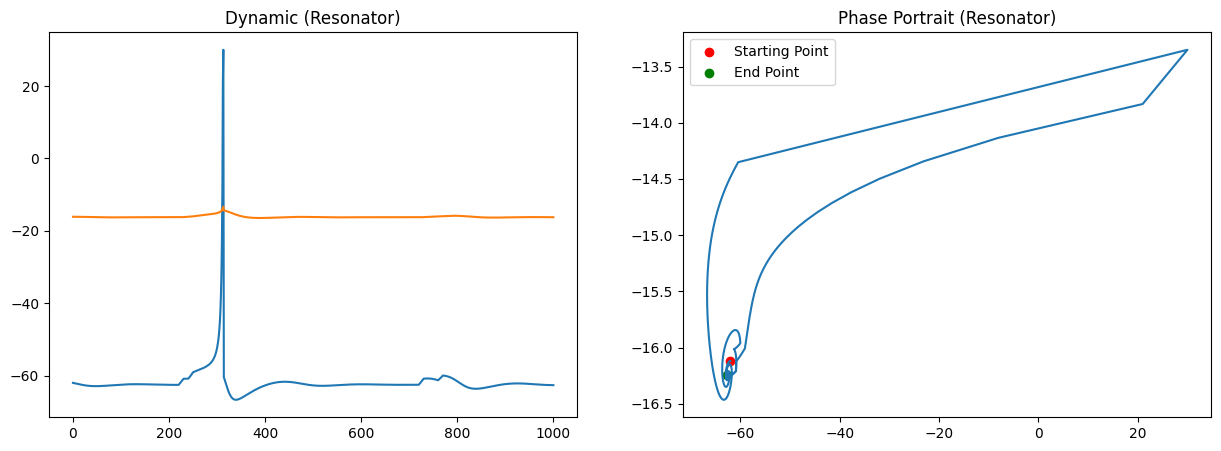

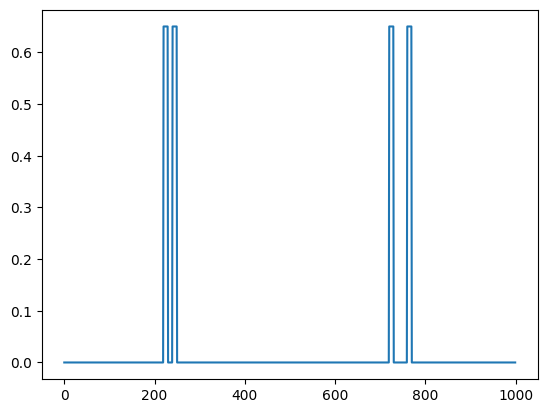

In [ ]:
u = -62
I11 = np.zeros(1000)
I11[220:230] = 0.65
I11[240:250] = 0.65
I11[720:730] = 0.65
I11[760:770] = 0.65
param_dict["resonator"]["I"] = I11

u, w = simulate_and_plot(u, "resonator", delta_t=0.25)
plt.plot(param_dict["resonator"]["I"])


### (L) Integrator

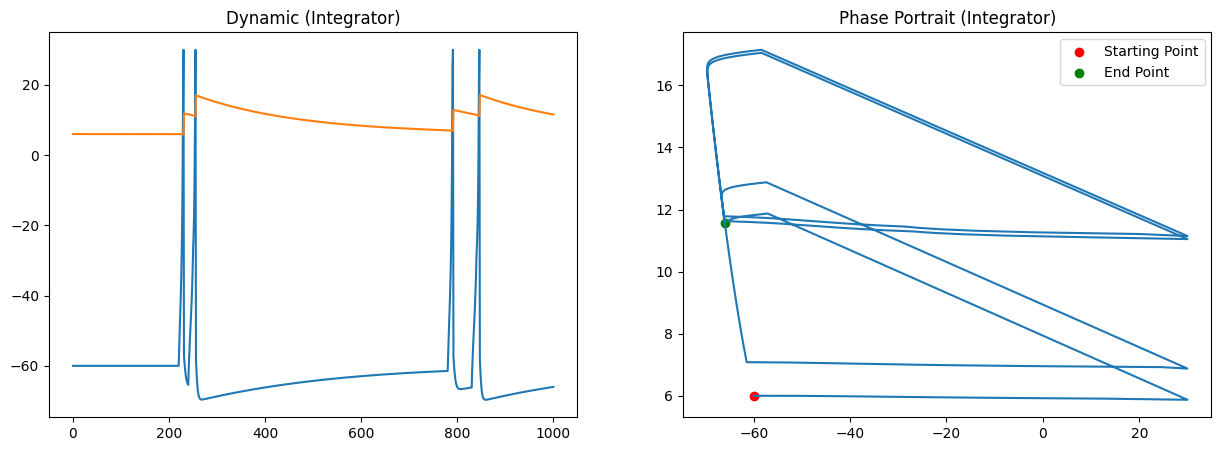

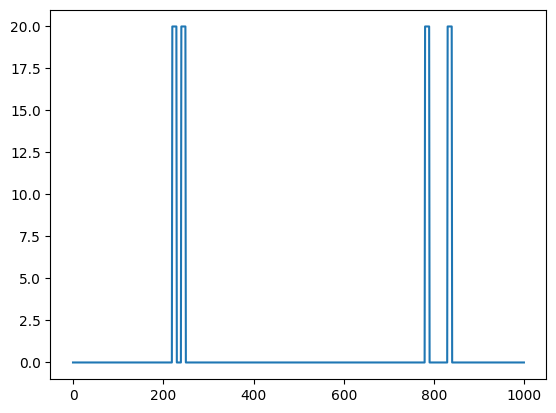

In [ ]:
u = -60
uu, ww = simulate_and_plot(u, "integrator", delta_t=0.25, p_0 = 108, p_1 = 4.1, p_2 = 0.04);
plt.plot(param_dict["integrator"]["I"])

### (M) Rebound Spike

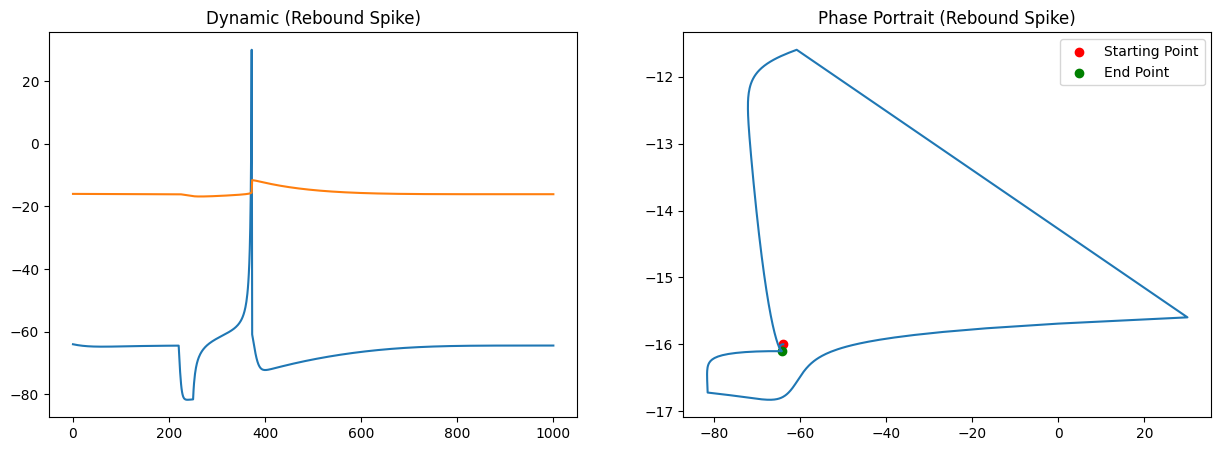

In [ ]:
u = -64
I13 = np.zeros(1000)
I13[220:250] = -15
param_dict["rebound_spike"]["I"] = I13
uu, ww = simulate_and_plot(u, "rebound_spike", delta_t=0.2);

### (N) Rebound Burst

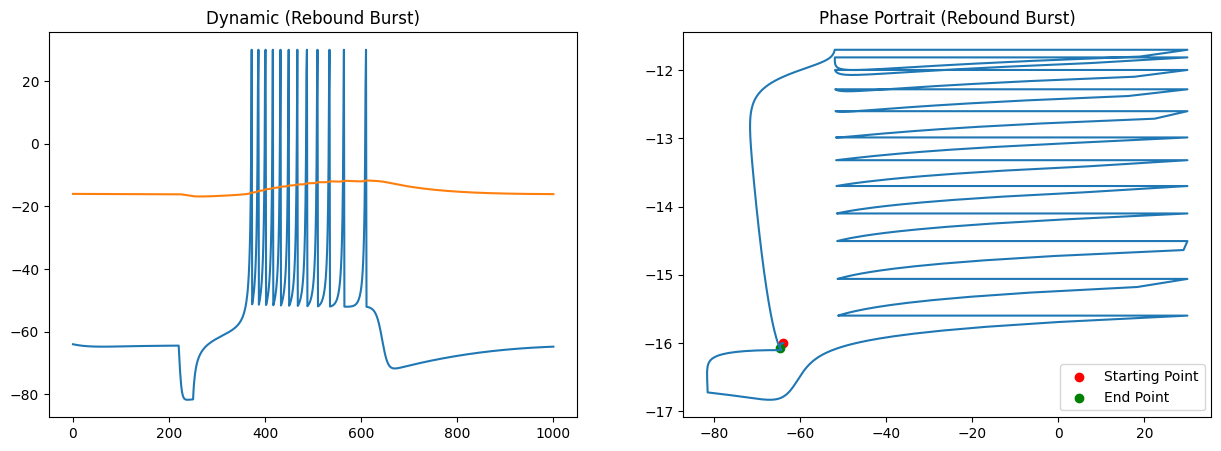

In [ ]:
u = -64
param_dict["rebound_burst"]["I"] = I13 # same as rebound spike

simulate_and_plot(u, "rebound_burst", delta_t=0.2);

### (O) Threshold variability

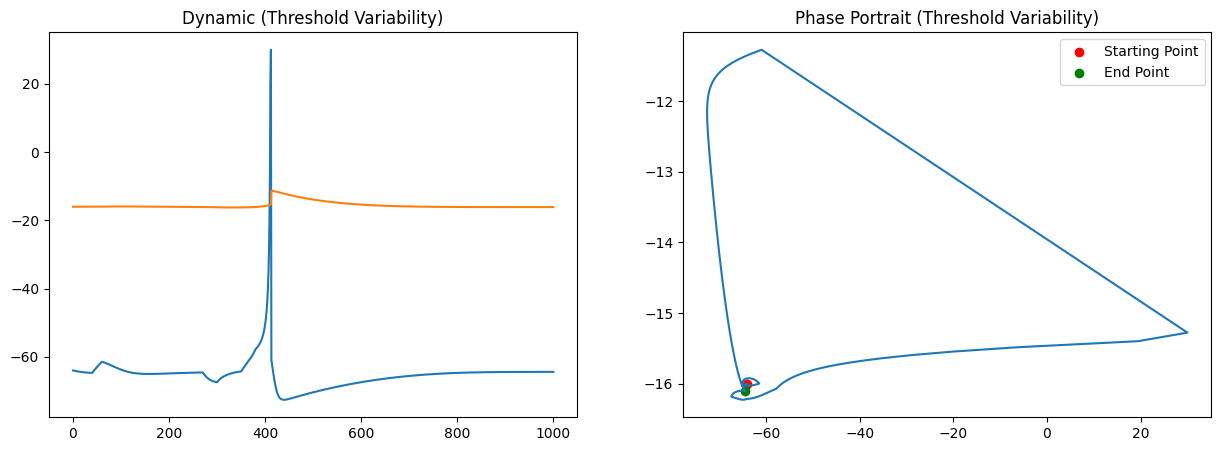

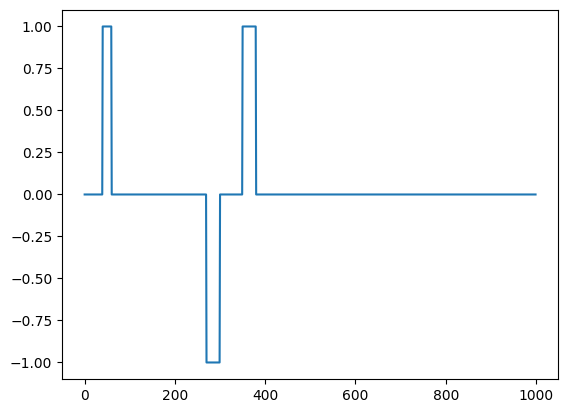

In [ ]:
u = -64
I14 = np.zeros(1000)
I14[40:60] = 1
I14[270:300] = -1
I14[350:380] = 1
param_dict["threshold_variability"]["I"] = I14
simulate_and_plot(u, "threshold_variability", delta_t=0.2);
plt.plot(param_dict["threshold_variability"]["I"])

### (P) Bistability

(array([151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 865, 866, 867, 868, 869, 870, 871,
       872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883],
      dtype=int64),)


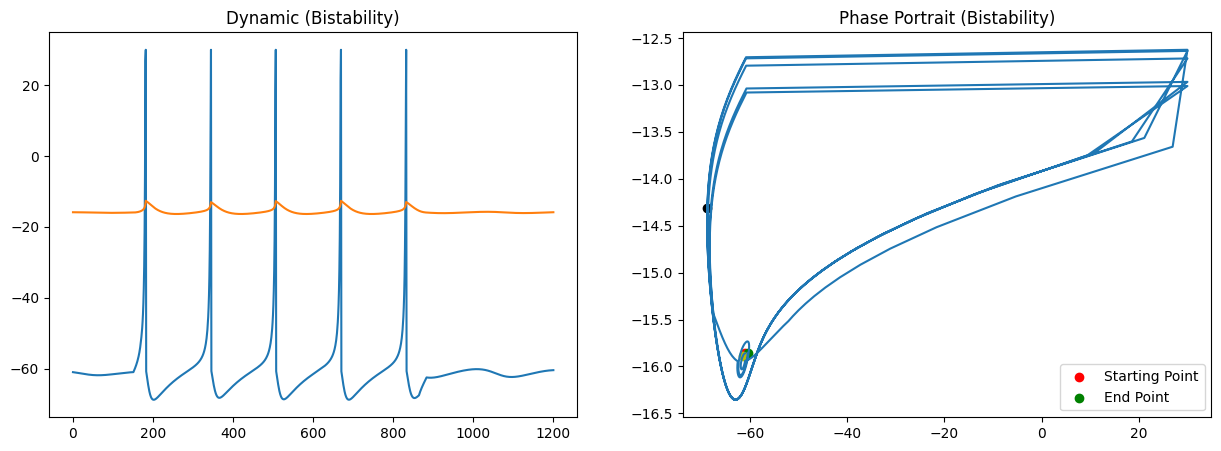

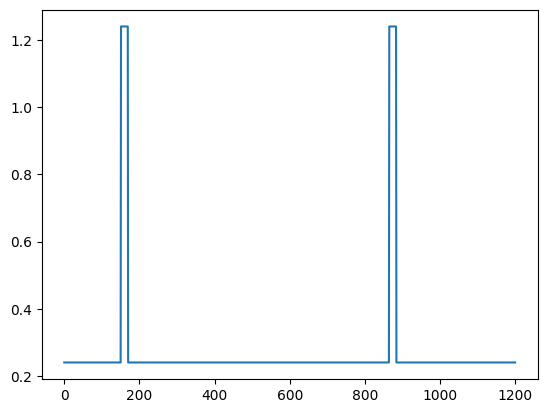

In [ ]:
u = -61
I15 = np.zeros(1201) + 0.24
I15[151:170]+=1
I15[865:884]+=1
print(np.where(np.array(I15)>0.4))

param_dict["bistability"]["I"] = I15
uu, ww, ax = simulate_and_plot(u, "bistability", delta_t=0.25)
ax[1].scatter(uu[200], ww[200], c='k', label='First input')
ax[1].scatter(uu[T1], ww[T1], c='y')
plt.show()

plt.plot(param_dict["bistability"]["I"])



### (Q) Depolarizing after-potential

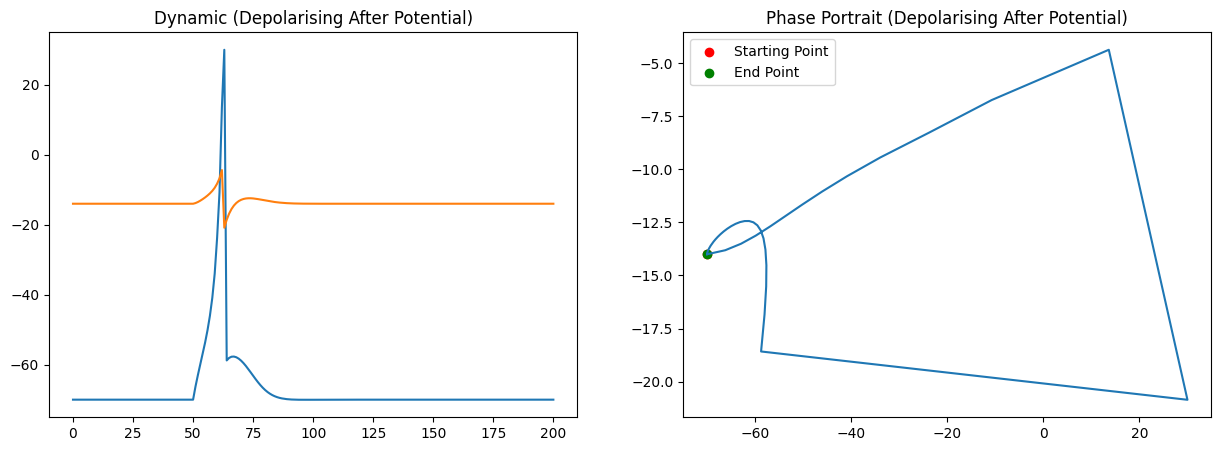

In [ ]:
u = -70
I16=np.zeros(200)
I16[50:60]=15
param_dict['depolarising_after_potential']['I']=I16
simulate_and_plot(u, 'depolarising_after_potential');

### (R) Accomodation

### (S) Inhibition-induced spiking

([-63.8,
  -63.791199999999996,
  -63.78290005119998,
  -63.77511334011659,
  -63.76785073195459,
  -63.76112079788974,
  -63.754929845823426,
  -63.74928195511936,
  -63.74417901580727,
  -63.739620772703915,
  -63.73560487485582,
  -63.732126930654,
  -63.729180568908745,
  -63.726757506101364,
  -63.72484761995373,
  -63.723439029374,
  -63.722518180750235,
  -63.72206994047482,
  -63.72207769349178,
  -63.72252344756898,
  -63.72338794290837,
  -63.724650766622624,
  -63.72629047152595,
  -63.728284698613436,
  -63.73061030253696,
  -63.733243479329964,
  -63.7361598955856,
  -63.739334818258854,
  -63.742743244239136,
  -63.74636002882931,
  -63.7501600122682,
  -63.75411814344824,
  -63.75820960000506,
  -63.76240990399458,
  -63.76669503242036,
  -63.77104152193233,
  -63.775426567084466,
  -63.77982811161182,
  -63.78422493226705,
  -63.788596714838874,
  -63.7929241220608,
  -63.797188853205064,
  -63.80137369524239,
  -63.805462565532245,
  -63.809440546089526,
  -63.81329390

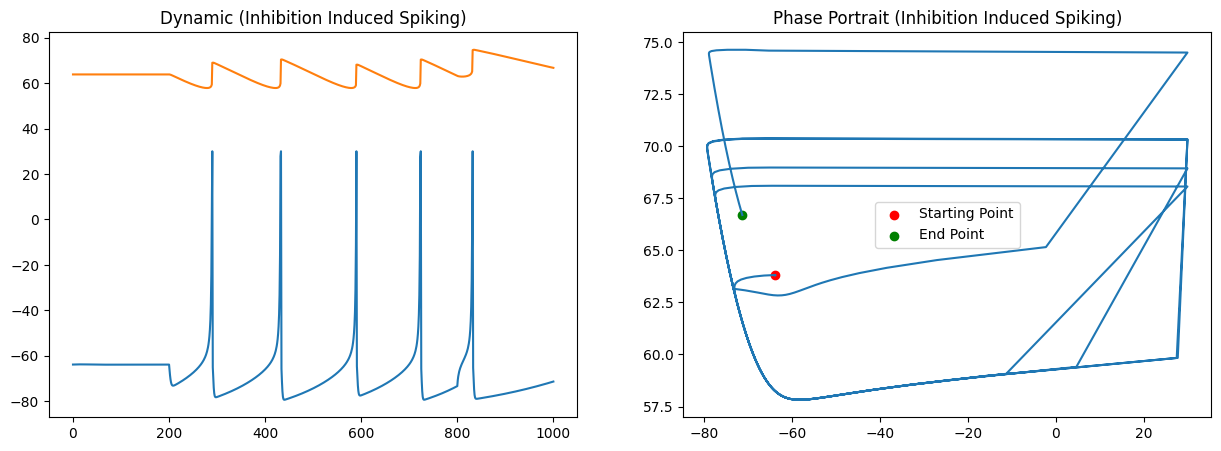

In [ ]:
u =-63.8
simulate_and_plot(u, key='inhibition_induced_spiking', delta_t=0.5)

### (T) Inhibition-induced bursting

([-63.8,
  -63.79559999999999,
  -63.79132135639999,
  -63.787167547215894,
  -63.78314183472172,
  -63.77924726489999,
  -63.77548666704447,
  -63.7718626535201,
  -63.768377619685204,
  -63.765033743981014,
  -63.76183298819396,
  -63.7587770978959,
  -63.755867603067756,
  -63.75310581891161,
  -63.75049284685652,
  -63.74802957576301,
  -63.745716683330784,
  -63.74355463771427,
  -63.74154369935003,
  -63.73968392299973,
  -63.73797516001203,
  -63.73641706080613,
  -63.73500907757944,
  -63.73375046724084,
  -63.73264029457103,
  -63.73167743561036,
  -63.73086058127389,
  -63.73018824119309,
  -63.729658747782565,
  -63.7292702605295,
  -63.729020770503034,
  -63.72890810507954,
  -63.72892993287955,
  -63.72908376891086,
  -63.72936697991185,
  -63.72977678988825,
  -63.73031028583554,
  -63.73096442363911,
  -63.731736034142614,
  -63.73262182937531,
  -63.73361840892757,
  -63.73472226646381,
  -63.7359297963611,
  -63.73723730046121,
  -63.73864099492353,
  -63.7401370171655

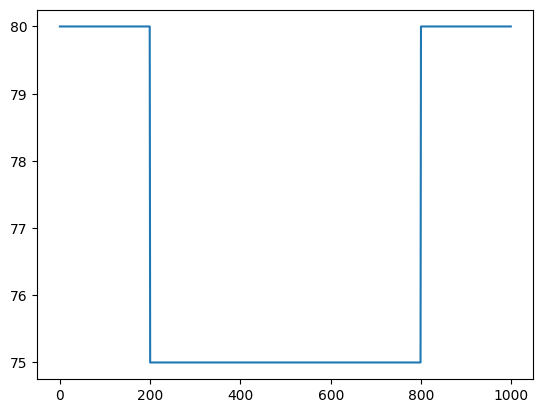

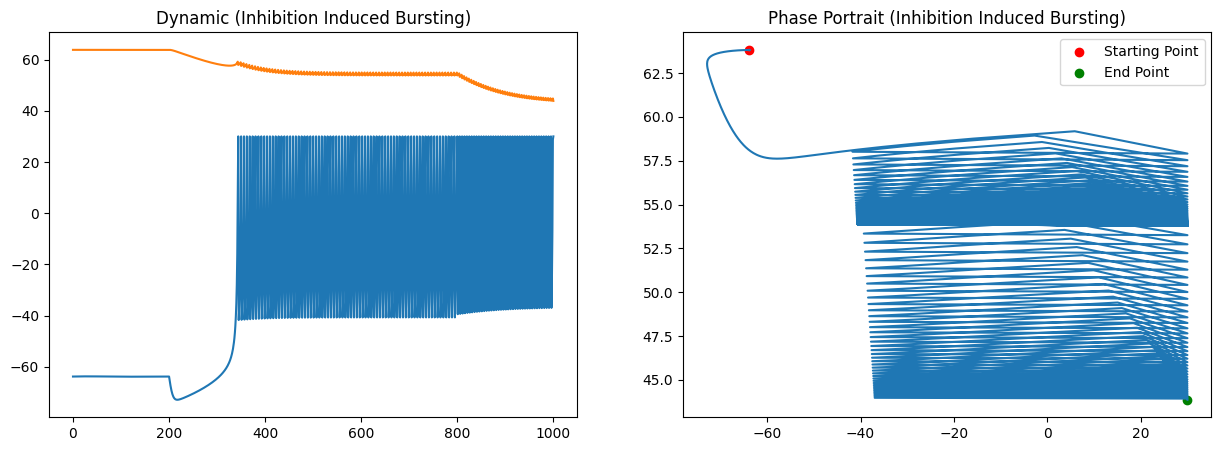

In [ ]:
u = -63.8
param_dict['inhibition_induced_bursting']['I'] = param_dict['inhibition_induced_spiking']['I']
plt.plot(param_dict['inhibition_induced_bursting']['I'] )
simulate_and_plot(u, key='inhibition_induced_bursting', delta_t=0.25)

In [ ]:
# general-purpose solver with Euler method

def euler_solver(variables, F, delta_t, T=100, reset_function=None, params=None, reset_params=None ):
    """
    Simulate a system of ODEs using Euler's method.
    inputs:
    variables: list of initial values 
    F: list of functions:  d x_i / dt = F_i(x_1, x_2, ..., x_n) where x_i is the ith variable
    delta_t: time step
    T: total time
    reset_function: function to reset the variables
    params: list of dict: parameters for the functions in F
    """

    
    if params is None:
        params = [{} for _ in range(len(variables))]

    if reset_function is not None and reset_params is None:
        reset_params = [{} for _ in range(len(variables))]

    steps = int(T/delta_t)
    var_dynamics= np.zeros((len(variables),  steps))
    
    for t in range(steps):
        var_new= np.zeros_like(variables)
        for i, x in enumerate(variables):
            
            var_new[i] = x + delta_t * F[i](*variables, t, **params[i])
            
            if reset_function is not None:
                var_new = reset_function(*var_new, **reset_params[i])
            variables=var_new
            var_dynamics[:,  t] =var_new
    return var_dynamics
    

In [ ]:
def leapfrog_solver(variables, F, delta_t, T=100, reset_function=None, **kwargs):
    
    steps = int(T/delta_t)
    var_dynamics= np.zeros((len(variables),  steps))
    for t in range(steps):
        for i, x in enumerate(variables):
           # apply the update rule with the necessary arguments
            variables[i] = x + delta_t * F[i](*variables, t, **kwargs[i])
           
            if reset_function is not None:
                variables = reset_function(*variables)
            var_dynamics[:,  t] =variables
    return var_dynamics

In [ ]:
def iziechevich_u(u, w, t,  I, p_0, p_1, p_2):
    return p_2*u**2 + p_1*u + p_0 -w + I[t]

def iziechevich_w(u, w, t, a, b):
    return a*(b*u -w)

def iziechevich_reset(u, w, c, d):
    if u>=30:
        u=c
        w+=d
    return u, w

In [ ]:
# Parameters for (A) tonic spiking -> I = 14 if t > T1 else 0
T = 100
delta_t = 0.25
u = -70
b = 0.2
a = 0.02
c = -65
d = 6
p_0 = 140
p_1 = 5
p_2 = 0.04
I = np.zeros(int(T/delta_t))
T1 = 22
I[int(T1/delta_t):] = 14

In [ ]:
variables = [u, b*u]
F = [iziechevich_u, iziechevich_w]
params = [{'I': I, 'p_0': p_0, 'p_1': p_1, 'p_2': p_2}, {'a': a, 'b': b}]
reset_function = iziechevich_reset
reset_params = [{'c': c, 'd': d}, {'c': c, 'd': d}]

dynamics,  = euler_solver(variables, F, delta_t, T, reset_function, params, reset_params)

TypeError: 'tuple' object does not support item assignment

In [ ]:

# create input currents vector for each neuro type

# Parameters for (A) tonic spiking -> I = 14 if t > T1 else 0
I1 = np.zeros(1000)
I1[220:] = 14

# Parameters for (B) phasic spiking -> I = 15 if t > T1 else 0
I2 = np.zeros(1000)
I2[220:] = 0.5

# Parameters for (C) tonic bursting -> I = 15 if t > T1 else 0
I3 = np.zeros(1000)
I3[220:] = 15

# Parameters for (D) phasic bursting -> I = 0.6 if t > T1 else 0
I4 = np.zeros(1000)
I4[200:] = 0.6

# Parameters for (E) mixed mode -> I = 10 if t > T1 else 0
I5 = np.zeros(1000)
I5[220:] = 10

# Parameters for (F) spike frequency adaptation -> I = 30 if t > T1 else 0
I6 = np.zeros(1000)
I6[85:] = 30

# Parameters for (G) Class 1 excitable
I7 = np.zeros(1000)
I7[100:] = 0.055 * (np.arange(0, 900))

# Parameters for (H) Class 2 excitable
I8 = np.zeros(1000) -0.5
I8[300:] = -0.5 + (0.015 * (np.arange(700)))

# Parameters for (I) spike latency -> I = 7.04 if t > T1 and t < T1+3 else 0
I9 = np.zeros(1000)
I9[220:250] = 7.04

# Parameters for (J) subthreshold oscillations -> I = 2 if t > T1 and t < T1+5 else 0
I10 = np.zeros(1000)
I10[220:225] = 2

# Parameters for (K) resonator -> I = 0.65 if ((t>T1) and (t < T1+4)) or ((t>T2) and (t < T2+4)) or ((t>T3) and (t < T3+4)) or ((t>T4) and (t < T4+4))  else 0
I11 = np.zeros(1000)

I11[220:230] = 0.65
I11[240:250] = 0.65
I11[720:730] = 0.65
I11[760:770] = 0.65

# Parameters for (L) integrator -> I = 9 if ((t>T1) and (t < T1+2)) or ((t>T2) and (t < T2+2)) or ((t>T3) and (t < T3+2)) or ((t>T4) and (t < T4+2))  else 0
I12 = np.zeros(1000)
I12[220:230] = 20
I12[240:250] = 20
I12[780:790] = 20
I12[830:840] = 20


# Parameters for (M) rebound spike -> I = -15 if (t>T1) and (t < T1+5)  else 0
I13 = np.zeros(1000)
I13[220:270] = -15

# Parameters for (N) rebound burst -> I = -15 if (t>T1) and (t < T1+5)  else 0
I13 = np.zeros(1000)
I13[220:225] = -15

# Parameters for (O) threshold variability -> I = 1 if ((t>10) and (t < 15)) or ((t>80) and (t < 85)) else -6 if (t>70) and (t < 75) else 0
I14 = np.zeros(1000)
I14[40:45] = 1
I14[320:325] = 1
I14[280:285] = -6

# Parameters for (P) bistability -> I = 1.24 if ((t>T1) and (t < T1+5)) or ((t>T2) and (t < T2+5)) else 0.24
I15 = np.zeros(1000) + 0.24
I15[220:225] = 1.24
I15[770:775] = 1.24


# Parameters for (Q) Depolarising After-Potential -> I = 20 if np.abs(t-T1)<1  else 0
I16 = np.zeros(1000)
I16[90:110] = 10

# Parameters for (R) accomodation -> I = t / 25 if (t < 200) else 0 if t < 300 else (t-300) / 12.5 * 4 if  t < 312.5 else 0
I17 = np.zeros(1000)
I17[:200] = np.arange(200) / 25
I17[300:500] = 0
I17[500:520] = (np.arange(520-500)) / 12.5 * 4

# Parameters for (S) inhibition induced spiking -> I = 80 if (t < 50) or (t>250)  else 75
I18 = np.zeros(1000)+80
I18[200:800]=75

# Parameters for (T) inhibition induced bursting -> I = 80 if (t < 50) or (t>250)  else 75
I19 = 75*np.ones(1000)+80
I19[100:150] = 75


param_dict = {
    "tonic_spiking": {"I": I1, "a": 0.02, "b": 0.2, "c": -65, "d": 6},
    "phasic_spiking": {"I": I2, "a": 0.02, "b": 0.25, "c": -65, "d": 6},
    "tonic_bursting": {"I": I3, "a": 0.02, "b": 0.25, "c": -50, "d": 2},
    "phasic_bursting": {"I": I4, "a": 0.02, "b": 0.25, "c": -55, "d": 0},
    "mixed_mode": {"I": I5, "a": 0.02, "b": 0.2, "c": -55, "d": 4},
    "spike_frequency_adaptation": {"I": I6, "a": 0.01, "b": 0.2, "c": -65, "d": 8},
    "class_1_excitable": {"I": I7, "a": 0.02, "b": -0.1, "c": -55, "d": 6},
    "class_2_excitable": {"I": I8, "a": 0.2, "b": 0.26, "c": -65, "d": 0},
    "spike_latency": {"I": I9, "a": 0.02, "b": 0.2, "c": -65, "d": 6},
    "subthreshold_oscillations": {"I": I10, "a": 0.05, "b": 0.26, "c": -60, "d": 0},
    "resonator": {"I": I11, "a": 0.1, "b": 0.26, "c": -60, "d": -1},
    "integrator": {"I": I12, "a": 0.02, "b": -0.1, "c": -55, "d": 6},
    "rebound_spike": {"I": I13, "a": 0.03, "b": 0.25, "c": -60, "d": 4},
    "rebound_burst": {"I": I13, "a": 0.03, "b": 0.25, "c": -52, "d": 0},
    "threshold_variability": {"I": I14, "a": 0.03, "b": 0.25, "c": -60, "d": 4},
    "bistability": {"I": I15, "a": 0.1, "b": 0.26, "c": -60, "d": 0},
    "depolarising_after_potential": {"I": I16, "a": 1, "b": 0.2, "c": -60, "d": -21},
    "accomodation": {"I": I17, "a": 0.02, "b": 1, "c": -55, "d": 4},
    "inhibition_induced_spiking": {"I": I18, "a": -0.02, "b": -1, "c": -60, "d": 8},
    "inhibition_induced_bursting": {"I": I19, "a": -0.026, "b": -1, "c": -45, "d": -2}
}